In [1]:
import pandas as pd
nfl = pd.read_csv("/Users/santiagolampon/Desktop/python_work/nfl_pass_rush_receive_raw_data.csv")

In [2]:
nfl.head()

game_id player_id pos                    player team  pass_cmp  \
0  201909050chi  RodgAa00  QB             Aaron Rodgers  GNB        18   
1  201909050chi  JoneAa00  RB               Aaron Jones  GNB         0   
2  201909050chi  ValdMa00  WR  Marquez Valdes-Scantling  GNB         0   
3  201909050chi  AdamDa01  WR             Davante Adams  GNB         0   
4  201909050chi  GrahJi00  TE              Jimmy Graham  GNB         0   

   pass_att  pass_yds  pass_td  pass_int  ...  pass_target_yds  \
0        30       203        1         0  ...              300   
1         0         0        0         0  ...                0   
2         0         0        0         0  ...                0   
3         0         0        0         0  ...                0   
4         0         0        0         0  ...                0   

   rush_yds_before_contact  rush_yac  rec_yac      Roof  Surface  Temperature  \
0                        6         2        0  outdoors    grass           65   
1                       21        18        1  outdoors    grass           65   
2                        0         0        2  outdoors    grass           65   
3                        0         0       19  outdoors    grass           65   
4                        0         0       17  outdoors    grass           65   

   Humidity  Wind_Speed  game_date  
0        69          10   9/5/2019  
1        69          10   9/5/2019  
2        69          10   9/5/2019  
3        69          10   9/5/2019  
4        69          10   9/5/2019  

[5 rows x 35 columns]

In [3]:
nfl.shape

(22245, 35)

In [4]:
#Import packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [5]:
nfl.columns

Index(['game_id', 'player_id', 'pos', 'player', 'team', 'pass_cmp', 'pass_att',
       'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds',
       'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td',
       'rush_long', 'targets', 'rec', 'rec_yds', 'rec_td', 'rec_long',
       'Team_abbrev', 'Opponent_abbrev', 'pass_target_yds',
       'rush_yds_before_contact', 'rush_yac', 'rec_yac', 'Roof', 'Surface',
       'Temperature', 'Humidity', 'Wind_Speed', 'game_date'],
      dtype='object')

In [6]:
# Get total passing yards and touchdowns by week
df_agg = (
    nfl.groupby(["team"], as_index=False)
    .agg({"pass_yds": "sum", "pass_att": "sum"})
)

In [7]:
df_agg

team  pass_yds  pass_att
0                   ARI     14130      2010
1                   ATL     14711      2022
2                   BAL     12579      1758
3                   BUF     16434      2240
4                   CAR     12977      1962
5                   CHI     12201      1880
6                   CIN     15343      2124
7                   CLE     12960      1837
8                   DAL     15800      2112
9                   DEN     12372      1799
10                  DET     13829      1933
11  ERROR - abbrev_team         0         0
12                  GNB     15754      2089
13                  HOU     14239      1869
14                  IND     13162      1885
15                  JAX     13049      2012
16                  KAN     18958      2429
17                  LAC     15926      2155
18                  LAR     16919      2250
19                  LVR     14894      1941
20                  MIA     13802      2010
21                  MIN     14396      1876
22                  NOR     14007      1919
23                  NWE     13235      1843
24                  NYG     11901      1879
25                  NYJ     12009      1855
26                  PHI     13325      1960
27                  PIT     13387      2153
28                  SEA     14448      1852
29                  SFO     14876      1842
30                  TAM     18599      2463
31                  TEN     13287      1711
32                  WAS     12542      1906

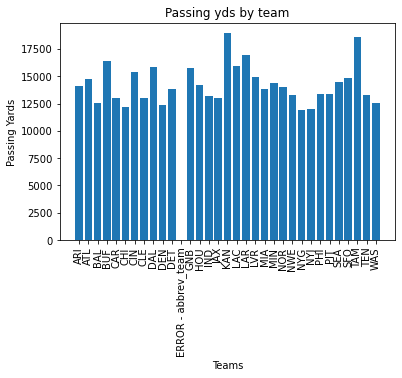

In [12]:
plt.bar(df_agg.team, df_agg.pass_yds)
plt.title('Passing yds by team')
plt.xlabel('Teams')
plt.ylabel('Passing Yards')
plt.xticks(rotation = 90) 
plt.show()

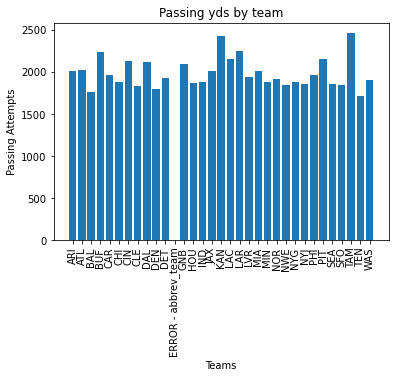

In [8]:
plt.bar(df_agg.team, df_agg.pass_att)
plt.title('Passing yds by team')
plt.xlabel('Teams')
plt.ylabel('Passing Attempts')
plt.xticks(rotation = 90) 
plt.show()

In [5]:
import csv
#read data in
infile ="/Users/santiagolampon/Desktop/nfl_pass_rush_receive_raw_data.csv"
#empty list
NFLList = []
#read as CSV, for loop to add lines of data to empty list, if conditions for the format we want.
with open(infile, 'r') as csvfile:
    NFLReader = csv.reader(csvfile,  dialect='excel', delimiter=',')
    for line in NFLReader:
        if line[0] == '' or line[0].startswith('game_id'):
            continue
        else:
            NFLgame = {}

            NFLgame['year'] = line[34]
            NFLgame['player'] = line[3]
            NFLgame['position'] = line[2]
            NFLgame['team'] = line[4]
            NFLgame['pass_cmp'] = int(line[5].replace(',',''))
            NFLgame['pass_att'] = int(line[6].replace(',',''))
            NFLgame['pass_yds'] = int(line[7].replace(',',''))
            NFLgame['pass_td'] = int(line[8].replace(',',''))
            NFLgame['rush_att'] = int(line[14].replace(',',''))
            NFLgame['rush_yds'] = int(line[15].replace(',',''))
            NFLgame['rush_td'] = int(line[16].replace(',',''))
            NFLgame['targets'] = int(line[17].replace(',',''))
            NFLgame['rec'] = int(line[18].replace(',',''))
            NFLgame['rec_yds'] = int(line[19].replace(',',''))
            NFLgame['rec_td'] = int(line[20].replace(',',''))

            NFLList.append(NFLgame)

    
csvfile.close()

In [6]:
#test for loop to see if it is pulling data 
for NFLgame in NFLList:
    if NFLgame['player'] == 'Aaron Rodgers' and NFLgame['year']== '2019':
        print(NFLgame['player'], NFLgame['pass_cmp'])

Aaron Rodgers 18
Aaron Rodgers 22
Aaron Rodgers 17
Aaron Rodgers 34
Aaron Rodgers 22
Aaron Rodgers 24
Aaron Rodgers 25
Aaron Rodgers 23
Aaron Rodgers 23
Aaron Rodgers 17
Aaron Rodgers 20
Aaron Rodgers 21
Aaron Rodgers 18
Aaron Rodgers 16
Aaron Rodgers 26
Aaron Rodgers 27


In [7]:
#Find rushing yards for each season for top running backs. 
RushYds19Chubb= []
for NFLgame in NFLList:
    if NFLgame['year']=='2019' and NFLgame['player']=='Nick Chubb':
        RushYds19Chubb.append(int(NFLgame['rush_yds']))
        print(RushYds19Chubb)
#code will be repeated several times for two of my favorite running backs Nick Chubb and Derrick Henry.
#It pulls the week by week rushing yards for the selected season. 

[75]
[75, 62]
[75, 62, 96]
[75, 62, 96, 165]
[75, 62, 96, 165, 87]
[75, 62, 96, 165, 87, 122]
[75, 62, 96, 165, 87, 122, 131]
[75, 62, 96, 165, 87, 122, 131, 65]
[75, 62, 96, 165, 87, 122, 131, 65, 116]
[75, 62, 96, 165, 87, 122, 131, 65, 116, 92]
[75, 62, 96, 165, 87, 122, 131, 65, 116, 92, 106]
[75, 62, 96, 165, 87, 122, 131, 65, 116, 92, 106, 58]
[75, 62, 96, 165, 87, 122, 131, 65, 116, 92, 106, 58, 106]
[75, 62, 96, 165, 87, 122, 131, 65, 116, 92, 106, 58, 106, 127]
[75, 62, 96, 165, 87, 122, 131, 65, 116, 92, 106, 58, 106, 127, 45]
[75, 62, 96, 165, 87, 122, 131, 65, 116, 92, 106, 58, 106, 127, 45, 41]


In [8]:
#total yards per season, average yards per season (average is better because it is better reflects when someone is injured.)
print("Chubb")
print("Total Yards 2019:",sum(RushYds19Chubb))
average19Chubb= sum(RushYds19Chubb)/len(RushYds19Chubb)
print("Average Yards 2019:",average19Chubb)

Chubb
Total Yards 2019: 1494
Average Yards 2019: 93.375


In [9]:
RushYds20Chubb= []
for NFLgame in NFLList:
    if NFLgame['year']=='2020' and NFLgame['player']=='Nick Chubb':
        RushYds20Chubb.append(int(NFLgame['rush_yds']))
        print(RushYds20Chubb)

[60]
[60, 124]
[60, 124, 108]
[60, 124, 108, 43]
[60, 124, 108, 43, 126]
[60, 124, 108, 43, 126, 114]
[60, 124, 108, 43, 126, 114, 144]
[60, 124, 108, 43, 126, 114, 144, 80]
[60, 124, 108, 43, 126, 114, 144, 80, 82]
[60, 124, 108, 43, 126, 114, 144, 80, 82, 50]
[60, 124, 108, 43, 126, 114, 144, 80, 82, 50, 28]


In [10]:
print("Chubb")
print("Total Yards 2020:",sum(RushYds20Chubb))
average20Chubb= sum(RushYds20Chubb)/len(RushYds20Chubb)
print("Average Yards 2020:",average20Chubb)

Chubb
Total Yards 2020: 959
Average Yards 2020: 87.18181818181819


In [11]:
RushYds21Chubb= []
for NFLgame in NFLList:
    if NFLgame['year']=='2021' and NFLgame['player']=='Nick Chubb':
        RushYds21Chubb.append(int(NFLgame['rush_yds']))
        print(RushYds21Chubb)

[108]
[108, 76]
[108, 76, 69]
[108, 76, 69, 83]
[108, 76, 69, 83, 95]
[108, 76, 69, 83, 95, 84]
[108, 76, 69, 83, 95, 84, 100]
[108, 76, 69, 83, 95, 84, 100, 161]
[108, 76, 69, 83, 95, 84, 100, 161, 61]
[108, 76, 69, 83, 95, 84, 100, 161, 61, 137]
[108, 76, 69, 83, 95, 84, 100, 161, 61, 137, 130]
[108, 76, 69, 83, 95, 84, 100, 161, 61, 137, 130, 16]
[108, 76, 69, 83, 95, 84, 100, 161, 61, 137, 130, 16, 59]
[108, 76, 69, 83, 95, 84, 100, 161, 61, 137, 130, 16, 59, 91]
[108, 76, 69, 83, 95, 84, 100, 161, 61, 137, 130, 16, 59, 91, 126]


In [12]:
print("Chubb")
print("Total Yards 2021:",sum(RushYds21Chubb))
average21Chubb= sum(RushYds21Chubb)/len(RushYds21Chubb)
print("Average Yards 2021:",average21Chubb)

Chubb
Total Yards 2021: 1396
Average Yards 2021: 93.06666666666666


In [13]:
RushYds22Chubb= []
for NFLgame in NFLList:
    if NFLgame['year']=='2022' and NFLgame['player']=='Nick Chubb':
        RushYds22Chubb.append(int(NFLgame['rush_yds']))
        print(RushYds22Chubb)

[58]
[58, 58]
[58, 58, 141]
[58, 58, 141, 87]
[58, 58, 141, 87, 113]
[58, 58, 141, 87, 113, 118]
[58, 58, 141, 87, 113, 118, 134]
[58, 58, 141, 87, 113, 118, 134, 56]


In [15]:
#total yards per season, average yards per season (average is better because it is better reflects when someone is injured.)
print("Chubb")
print("Total Yards 2019:",sum(RushYds19Chubb))
average19Chubb= sum(RushYds19Chubb)/len(RushYds19Chubb)
print("Average Yards 2019:",average19Chubb)
print("Total Yards 2020:",sum(RushYds20Chubb))
average20Chubb= sum(RushYds20Chubb)/len(RushYds20Chubb)
print("Average Yards 2020:",average20Chubb)
print("Total Yards 2021:",sum(RushYds21Chubb))
average21Chubb= sum(RushYds21Chubb)/len(RushYds21Chubb)
print("Average Yards 2021:",average21Chubb)
print("Total Yards 2022:",sum(RushYds22Chubb))
average22Chubb= sum(RushYds22Chubb)/len(RushYds22Chubb)
print("Average Yards 2022:",average22Chubb)

Chubb
Total Yards 2019: 1494
Average Yards 2019: 93.375
Total Yards 2020: 959
Average Yards 2020: 87.18181818181819
Total Yards 2021: 1396
Average Yards 2021: 93.06666666666666
Total Yards 2022: 765
Average Yards 2022: 95.625


In [16]:
 RushYds19Henry= []
for NFLgame in NFLList:
    if NFLgame['year']=='2019' and NFLgame['player']=='Derrick Henry ':
        RushYds19Henry.append(int(NFLgame['rush_yds']))
        print(RushYds19Henry)

[82]
[82, 44]
[82, 44, 100]
[82, 44, 100, 78]
[82, 44, 100, 78, 28]
[82, 44, 100, 78, 28, 90]
[82, 44, 100, 78, 28, 90, 75]
[82, 44, 100, 78, 28, 90, 75, 63]
[82, 44, 100, 78, 28, 90, 75, 63, 188]
[82, 44, 100, 78, 28, 90, 75, 63, 188, 159]
[82, 44, 100, 78, 28, 90, 75, 63, 188, 159, 149]
[82, 44, 100, 78, 28, 90, 75, 63, 188, 159, 149, 103]
[82, 44, 100, 78, 28, 90, 75, 63, 188, 159, 149, 103, 86]
[82, 44, 100, 78, 28, 90, 75, 63, 188, 159, 149, 103, 86, 211]


In [18]:
 RushYds20Henry= []
for NFLgame in NFLList:
    if NFLgame['year']=='2020' and NFLgame['player']=='Derrick Henry ':
        RushYds20Henry.append(int(NFLgame['rush_yds']))
        print("Average Yards 2019:",RushYds20Henry)

Average Yards 2019: [182]
Average Yards 2019: [182, 195]
Average Yards 2019: [182, 195, 69]
Average Yards 2019: [182, 195, 69, 116]
Average Yards 2019: [182, 195, 69, 116, 84]
Average Yards 2019: [182, 195, 69, 116, 84, 119]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212, 75]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212, 75, 112]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212, 75, 112, 68]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212, 75, 112, 68, 103]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212, 75, 112, 68, 103, 133]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212, 75, 112, 68, 103, 133, 178]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212, 75, 112, 68, 103, 133, 178, 60]
Average Yards 2019: [182, 195, 69, 116, 84, 119, 57, 212, 75, 112, 68, 103, 133, 178, 60, 215]
Average Yards 2019: [182, 195, 69, 1

In [20]:
RushYds21Henry= []
for NFLgame in NFLList:
    if NFLgame['year']=='2021' and NFLgame['player']=='Derrick Henry ':
        RushYds21Henry.append(int(NFLgame['rush_yds']))
        print(RushYds21Henry)

[250]
[250, 40]
[250, 40, 61]
[250, 40, 61, 182]
[250, 40, 61, 182, 113]
[250, 40, 61, 182, 113, 157]
[250, 40, 61, 182, 113, 157, 130]
[250, 40, 61, 182, 113, 157, 130, 143]
[250, 40, 61, 182, 113, 157, 130, 143, 86]
[250, 40, 61, 182, 113, 157, 130, 143, 86, 68]


In [22]:
RushYds22Henry= []
for NFLgame in NFLList:
    if NFLgame['year']=='2022' and NFLgame['player']=='Derrick Henry ':
        RushYds22Henry.append(int(NFLgame['rush_yds']))
        print(RushYds22Henry)

[62]
[62, 82]
[62, 82, 25]
[62, 82, 25, 85]
[62, 82, 25, 85, 114]
[62, 82, 25, 85, 114, 102]


In [23]:
print("Total Yards 2019:",sum(RushYds19Henry))
average19Henry= sum(RushYds19Henry)/len(RushYds19Henry)
print("Average Yards 2019:",average19Henry)
print("Total Yards 2020:",sum(RushYds20Henry))
average20Henry= sum(RushYds20Henry)/len(RushYds20Henry)
print("Average Yards 2020:",average20Henry)
print("Total Yards 2021:",sum(RushYds21Henry))
average21Henry= sum(RushYds21Henry)/len(RushYds21Henry)
print("Average Yards 2021:",average21Henry)
print("Total Yards 2022:",sum(RushYds22Henry))
average22Henry= sum(RushYds22Henry)/len(RushYds22Henry)
print("Average Yards 2022:",average22Henry)

Total Yards 2019: 1456
Average Yards 2019: 104.0
Total Yards 2020: 2223
Average Yards 2020: 123.5
Total Yards 2021: 1230
Average Yards 2021: 123.0
Total Yards 2022: 470
Average Yards 2022: 78.33333333333333


In [24]:
#Import packages
import pandas as pd
import plotly.graph_objects as go
import nfl_data_py as nfl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# load data
df_2021 = nfl.import_pbp_data([2021])
df_players = nfl.import_rosters([2021])
df_teams = nfl.import_team_desc()

2021 done.
Downcasting floats.


/Users/santiagolampon/opt/anaconda3/lib/python3.9/site-packages/nfl_data_py/__init__.py:137: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plays.loc[:, cols] = plays.loc[:, cols].astype(numpy.float32)


In [26]:
# Filter to regular season
df_2021 = df_2021[df_2021["season_type"] == "REG"]
# Remove two point attempts
df_2021 = df_2021[df_2021["two_point_attempt"] == False]
# Filter to pass plays
df_2021 = df_2021[df_2021["play_type"] == "pass"]
df_players.columns

Index(['season', 'team', 'position', 'depth_chart_position', 'jersey_number',
       'status', 'player_name', 'first_name', 'last_name', 'birth_date',
       'height', 'weight', 'college', 'player_id', 'espn_id', 'sportradar_id',
       'yahoo_id', 'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id',
       'sleeper_id', 'years_exp', 'headshot_url', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name', 'esb_id',
       'gsis_it_id', 'smart_id', 'entry_year', 'rookie_year', 'draft_club',
       'draft_number'],
      dtype='object')

In [27]:
# Join with the roster table to get player names
df_2021 = df_2021.merge(df_players[["player_id", "player_name"]], left_on="passer_player_id", right_on="player_id")
# To make sure that our join worked, let’s check that the values of player_name are now present in our original dataframe.
df_2021["player_name"].unique()

array(['Ryan Tannehill', 'Kyler Murray', 'Matthias Farley', 'Derek Carr',
       'Lamar Jackson', 'Andy Dalton', 'Justin Fields',
       'Matthew Stafford', 'Baker Mayfield', 'Patrick Mahomes',
       'Tom Brady', 'Dak Prescott', 'Daniel Jones', 'Teddy Bridgewater',
       'Jameis Winston', 'Aaron Rodgers', 'Taysom Hill', 'Jordan Love',
       'Tyrod Taylor', 'Trevor Lawrence', 'Justin Herbert',
       'Ryan Fitzpatrick', 'Taylor Heinicke', 'Mac Jones',
       'Tua Tagovailoa', 'Kirk Cousins', 'Joe Burrow', 'Justin Jefferson',
       'Zach Wilson', 'Sam Darnold', 'Matt Ryan', 'Jalen Hurts',
       'Josh Allen', 'Ben Roethlisberger', 'Carson Wentz',
       'Russell Wilson', 'Jared Goff', 'Jimmy Garoppolo', 'Trey Lance',
       'Josh Rosen', 'Jacoby Brissett', 'Davis Mills', 'Jacob Eason',
       'Greg Ward', "D'Andre Swift", 'Mitchell Trubisky', 'Drew Lock',
       'Ty Long', 'Jakobi Meyers', 'Geno Smith', 'Blaine Gabbert',
       'Kadarius Toney', 'Mike Glennon', 'Cedrick Wilson',
    

In [28]:
# The corresponding key in the teams table is team_abbr. So, using this information, we can join to extract the team colors.
# join with team table to get team color for plot
df_2021 = df_2021.merge(df_teams[["team_abbr", "team_color"]], left_on="posteam", right_on="team_abbr")

In [29]:
# Get total passing yards and touchdowns by week
df_agg = (
    df_2021.groupby(["player_name", "team_abbr", "team_color", "week"], as_index=False)
    .agg({"passing_yards": "sum", "pass_touchdown": "sum"})
)
# Let’s see what our table looks like if we filter to a specific player
df_agg[df_agg["player_name"] == "Josh Allen"]

player_name team_abbr team_color  week  passing_yards  pass_touchdown
299  Josh Allen       BUF    #00338D     1          270.0             1.0
300  Josh Allen       BUF    #00338D     2          179.0             2.0
301  Josh Allen       BUF    #00338D     3          358.0             4.0
302  Josh Allen       BUF    #00338D     4          248.0             2.0
303  Josh Allen       BUF    #00338D     5          315.0             3.0
304  Josh Allen       BUF    #00338D     6          353.0             3.0
305  Josh Allen       BUF    #00338D     8          249.0             2.0
306  Josh Allen       BUF    #00338D     9          264.0             0.0
307  Josh Allen       BUF    #00338D    10          366.0             2.0
308  Josh Allen       BUF    #00338D    11          209.0             2.0
309  Josh Allen       BUF    #00338D    12          260.0             4.0
310  Josh Allen       BUF    #00338D    13          145.0             1.0
311  Josh Allen       BUF    #00338D    14          308.0             2.0
312  Josh Allen       BUF    #00338D    15          210.0             3.0
313  Josh Allen       BUF    #00338D    16          314.0             3.0
314  Josh Allen       BUF    #00338D    17          120.0             0.0
315  Josh Allen       BUF    #00338D    18          239.0             2.0

In [30]:
# Filter only players who have thrown a total of >1500 yards
# Cumulative passing yards during the 2021–22 NFL Season

fig = go.Figure()
for name, values in df_agg.groupby("player_name"):
    if values["passing_yards"].sum() > 4000:
        fig.add_trace(
            go.Scatter(
                x=values["week"], 
                y=values["passing_yards"].cumsum(), 
                name=name, 
                mode="markers+lines", 
                line_color=values.iloc[0].team_color,
                hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
            )
        )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Week",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Passing Yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
    
fig.show()

In [31]:
# Cumulative passing touchdowns during the 2021–22 NFL season >20
fig = go.Figure()
for name, values in df_agg.groupby("player_name"):
    if values["pass_touchdown"].sum() > 20:
        fig.add_trace(
            go.Scatter(
                x=values["week"], 
                y=values["pass_touchdown"].cumsum(), 
                name=name, 
                mode="markers+lines", 
                line_color=values.iloc[0].team_color,
                hovertemplate=f"<b>{name}</b><br>%{{y}} pass touchdowns through week %{{x}}<extra></extra>"
            )
        )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Week",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Passing Touchdowns",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
    
fig.show()

In [32]:
# load data
df1_2021 = nfl.import_pbp_data([2021])
df1_players = nfl.import_rosters([2021])
df1_teams = nfl.import_team_desc()

2021 done.
Downcasting floats.


/Users/santiagolampon/opt/anaconda3/lib/python3.9/site-packages/nfl_data_py/__init__.py:137: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [33]:
# Filter to regular season
df1_2021 = df1_2021[df1_2021["season_type"] == "REG"]
# Remove two point attempts
df1_2021 = df1_2021[df1_2021["two_point_attempt"] == False]
# Filter to run plays
df1_2021 = df1_2021[df1_2021["play_type"] == "run"]

In [34]:
# Join with the roster table to get player names
df1_2021 = df1_2021.merge(df1_players[["player_id", "player_name"]], left_on="rusher_player_id", right_on="player_id")
# To make sure that our join worked, let’s check that the values of player_name are now present in our original dataframe.
df1_2021["player_name"].unique()

array(['Derrick Henry', 'Kyler Murray', 'Chase Edmonds', 'James Conner',
       'Ryan Tannehill', 'Jeremy McNichols', 'Mekhi Sargent',
       'Marcus Mariota', 'Kenyan Drake', 'Derek Carr', 'Josh Jacobs',
       "Ty'Son Williams", 'Lamar Jackson', 'Trenton Cannon',
       'Latavius Murray', 'Marquise Brown', 'David Montgomery',
       'Damien Williams', 'Darrell Henderson', 'Matthew Stafford',
       'Marquise Goodwin', 'Robert Woods', 'Andy Dalton', 'Justin Fields',
       'Sony Michel', 'Nick Chubb', 'Baker Mayfield',
       'Clyde Edwards-Helaire', 'Tyreek Hill', 'Kareem Hunt',
       'Jarvis Landry', 'Michael Burton', 'Patrick Mahomes',
       'Anthony Schwartz', 'Blake Bell', 'Darrel Williams',
       'Jamie Gillan', 'Leonard Fournette', 'Ezekiel Elliott',
       'Ronald Jones', 'Tony Pollard', 'Dak Prescott', 'Saquon Barkley',
       'Devontae Booker', 'Melvin Gordon', 'Javonte Williams',
       'Teddy Bridgewater', 'Daniel Jones', 'Alvin Kamara',
       'Jameis Winston', 'Aaron 

In [35]:
# The corresponding key in the teams table is team_abbr. So, using this information, we can join to extract the team colors.
# join with team table to get team color for plot
df1_2021 = df1_2021.merge(df1_teams[["team_abbr", "team_color"]], left_on="posteam", right_on="team_abbr")

In [36]:
# Get total rushing yards and touchdowns by week 2021
df1_agg = (
    df1_2021.groupby(["player_name", "team_abbr", "team_color", "week"], as_index=False)
    .agg({"rushing_yards": "sum", "rush_touchdown": "sum"})
)
# Let’s see what our table looks like if we filter to a specific player
df1_agg[df1_agg["player_name"] == "Derrick Henry"]

player_name team_abbr team_color  week  rushing_yards  rush_touchdown
684  Derrick Henry       TEN    #002244     1           58.0             0.0
685  Derrick Henry       TEN    #002244     2          182.0             3.0
686  Derrick Henry       TEN    #002244     3          113.0             0.0
687  Derrick Henry       TEN    #002244     4          157.0             1.0
688  Derrick Henry       TEN    #002244     5          130.0             3.0
689  Derrick Henry       TEN    #002244     6          143.0             3.0
690  Derrick Henry       TEN    #002244     7           86.0             0.0
691  Derrick Henry       TEN    #002244     8           68.0             0.0

In [37]:
# Filter only players who have rushed a total of >1000 yards
# Cumulative rushing yards during the 2021–22 NFL Season

fig = go.Figure()
for name, values in df1_agg.groupby("player_name"):
    if values["rushing_yards"].sum() > 1000:
        fig.add_trace(
            go.Scatter(
                x=values["week"], 
                y=values["rushing_yards"].cumsum(), 
                name=name, 
                mode="markers+lines", 
                line_color=values.iloc[0].team_color,
                hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
            )
        )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Week",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Rushing Yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
    
fig.show()

In [38]:
# Cumulative rushing touchdowns during the 2021–22 NFL season >8
fig = go.Figure()
for name, values in df1_agg.groupby("player_name"):
    if values["rush_touchdown"].sum() > 8:
        fig.add_trace(
            go.Scatter(
                x=values["week"], 
                y=values["rush_touchdown"].cumsum(), 
                name=name, 
                mode="markers+lines", 
                line_color=values.iloc[0].team_color,
                hovertemplate=f"<b>{name}</b><br>%{{y}} rush touchdowns through week %{{x}}<extra></extra>"
            )
        )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Week",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Rushing Touchdowns",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
    
fig.show()

array([[<AxesSubplot:title={'center':'rushing_yards'}>]], dtype=object)

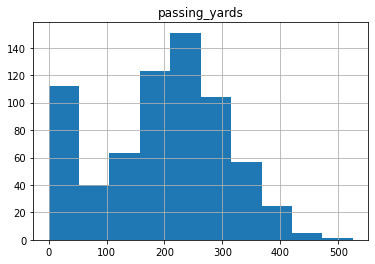

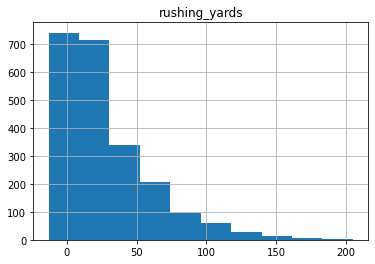

In [39]:
df_agg.hist(column='passing_yards')
df1_agg.hist(column='rushing_yards')

In [40]:
# load data
df_2009 = nfl.import_pbp_data([2009])
df_players = nfl.import_rosters([2009])
df_teams = nfl.import_team_desc()

2009 done.
Downcasting floats.


/Users/santiagolampon/opt/anaconda3/lib/python3.9/site-packages/nfl_data_py/__init__.py:137: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [41]:
# Filter to regular season
df_2009 = df_2009[df_2009["season_type"] == "REG"]
# Remove two point attempts
df_2009 = df_2009[df_2009["two_point_attempt"] == False]
# Filter to run plays
df_2009 = df_2009[df_2009["play_type"] == "run"]

In [42]:
# Join with the roster table to get player names
df_2009 = df_2009.merge(df_players[["player_id", "player_name"]], left_on="rusher_player_id", right_on="player_id")
# To make sure that our join worked, let’s check that the values of player_name are now present in our original dataframe.
df_2009["player_name"].unique()

array(['Fred Taylor', 'Laurence Maroney', 'Fred Jackson', 'Kevin Faulk',
       'Trent Edwards', 'Xavier Omon', 'Tom Brady', 'Ryan Grant',
       'Matt Forte', 'Garrett Wolfe', 'Jay Cutler', 'Aaron Rodgers',
       'Marion Barber', 'Tashard Choice', 'Tony Romo', 'Felix Jones',
       'Carnell Williams', 'Derrick Ward', 'Byron Leftwich',
       'Patrick Crayton', 'Clifton Smith', 'Earnest Graham',
       'Kellen Winslow', 'Correll Buckhalter', 'Cedric Benson',
       'Knowshon Moreno', 'Brian Leonard', 'Kevin Huber', 'Bernard Scott',
       'Chad Ochocinco', 'Peyton Hillis', 'Kyle Orton', 'LaMont Jordan',
       'Carson Palmer', 'Mike Bell', 'Reggie Bush', 'Kevin Smith',
       'Jerome Felton', 'Aaron Brown', 'Matthew Stafford', 'Joseph Addai',
       'Maurice Jones-Drew', 'David Garrard', 'Donald Brown',
       'Montell Owens', 'Larry Johnson', 'Joe Flacco', 'Ray Rice',
       'Willis McGahee', 'Tyler Thigpen', 'Jamaal Charles',
       "Le'Ron McClain", 'Mark Clayton', 'Michael Turner'

In [43]:
# The corresponding key in the teams table is team_abbr. So, using this information, we can join to extract the team colors.
# join with team table to get team color for plot
df_2009 = df_2009.merge(df_teams[["team_abbr", "team_color"]], left_on="posteam", right_on="team_abbr")

In [44]:
# Get total rushing yards and touchdowns by week 2009
df_agg2009 = (
    df_2009.groupby(["player_name", "team_abbr", "team_color", "week"], as_index=False)
    .agg({"rushing_yards": "sum", "rush_touchdown": "sum"})
)
# Let’s see what our table looks like if we filter to a specific player
df_agg2009[df_agg2009["player_name"] == "Adrian Peterson"]

player_name team_abbr team_color  week  rushing_yards  rush_touchdown
30  Adrian Peterson       CHI    #0B162A     2           16.0             0.0
31  Adrian Peterson       CHI    #0B162A     3           12.0             0.0
32  Adrian Peterson       CHI    #0B162A     9           23.0             0.0
33  Adrian Peterson       MIN    #4F2683     1          180.0             3.0
34  Adrian Peterson       MIN    #4F2683     2           92.0             1.0
35  Adrian Peterson       MIN    #4F2683     3           85.0             0.0
36  Adrian Peterson       MIN    #4F2683     4           55.0             1.0
37  Adrian Peterson       MIN    #4F2683     5           69.0             2.0
38  Adrian Peterson       MIN    #4F2683     6          143.0             0.0
39  Adrian Peterson       MIN    #4F2683     7           69.0             1.0
40  Adrian Peterson       MIN    #4F2683     8           97.0             1.0
41  Adrian Peterson       MIN    #4F2683    10          133.0             2.0
42  Adrian Peterson       MIN    #4F2683    11           82.0             0.0
43  Adrian Peterson       MIN    #4F2683    12           85.0             1.0
44  Adrian Peterson       MIN    #4F2683    13           19.0             0.0
45  Adrian Peterson       MIN    #4F2683    14           97.0             2.0
46  Adrian Peterson       MIN    #4F2683    15           35.0             1.0
47  Adrian Peterson       MIN    #4F2683    16           94.0             2.0
48  Adrian Peterson       MIN    #4F2683    17           54.0             1.0

In [45]:
# Filter only players who have rushed a total of >1000 yards
# Cumulative rushing yards during the 2009-10 NFL Season

fig = go.Figure()
for name, values in df_agg2009.groupby("player_name"):
    if values["rushing_yards"].sum() > 1000:
        fig.add_trace(
            go.Scatter(
                x=values["week"], 
                y=values["rushing_yards"].cumsum(), 
                name=name, 
                mode="markers+lines", 
                line_color=values.iloc[0].team_color,
                hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
            )
        )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Week",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Rushing Yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
    
fig.show()

In [46]:
# Cumulative rushing touchdowns during the 2009-2010 NFL season >8
fig = go.Figure()
for name, values in df_agg2009.groupby("player_name"):
    if values["rush_touchdown"].sum() > 8:
        fig.add_trace(
            go.Scatter(
                x=values["week"], 
                y=values["rush_touchdown"].cumsum(), 
                name=name, 
                mode="markers+lines", 
                line_color=values.iloc[0].team_color,
                hovertemplate=f"<b>{name}</b><br>%{{y}} rush touchdowns through week %{{x}}<extra></extra>"
            )
        )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Week",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Rushing Touchdowns",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
    
fig.show()

In [47]:
# Import scraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Import data manipulation modules
import pandas as pd
import numpy as np

# Import data visualization modules
import matplotlib as mpl
import matplotlib.pyplot as plt

In [48]:
# URL of page
url = 'https://www.pro-football-reference.com/years/2019/passing.htm'

# Open URL and pass to BeautifulSoup
html = urlopen(url)
stats_page = BeautifulSoup(html)

In [49]:
# Collect table headers
column_headers = stats_page.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]
# Collect table rows
rows = stats_page.findAll('tr')[1:]

# Get stats from each row
qb_stats = []
for i in range(len(rows)):
    qb_stats.append([col.getText() for col in rows[i].findAll('td')])

In [50]:
# Create DataFrame from our scraped data
data = pd.DataFrame(qb_stats, columns=column_headers[1:])

In [51]:
# Examine first five rows of data
data.head()

Player   Tm Age Pos   G  GS   QBrec  Cmp  Att  Cmp%  ...    Y/G  \
0  Jameis Winston  TAM  25  QB  16  16   7-9-0  380  626  60.7  ...  319.3   
1    Dak Prescott  DAL  26  QB  16  16   8-8-0  388  596  65.1  ...  306.4   
2      Jared Goff  LAR  25  QB  16  16   9-7-0  394  626  62.9  ...  289.9   
3   Philip Rivers  LAC  38  QB  16  16  5-11-0  390  591  66.0  ...  288.4   
4       Matt Ryan  ATL  34  QB  15  15   7-8-0  408  616  66.2  ...  297.7   

   Rate   QBR  Sk  Yds  Sk%  NY/A ANY/A 4QC GWD  
0  84.3  55.7  47  282  7.0  7.17  6.15   2   2  
1  99.7  71.9  23  151  3.7  7.68  7.84          
2  86.5  50.6  22  170  3.4  6.90  6.46   1   2  
3  88.5  50.5  34  222  5.4  7.03  6.32   1   2  
4  92.1  59.6  48  316  7.2  6.25  6.08   3   2  

[5 rows x 30 columns]

In [52]:
# View columns in data
data.columns
# Rename sack yards column to `Yds_Sack`
new_columns = data.columns.values
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sack', 'Sk%', 'NY/A', 'ANY/A', '4QC',
       'GWD'],
      dtype='object')

In [53]:
# Select stat categories
categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']
# Create data subset for radar chart
data_radar = data[['Player', 'Tm'] + categories]
data_radar.head()

Player   Tm  Cmp%   Yds  TD Int  Y/A  Rate
0  Jameis Winston  TAM  60.7  5109  33  30  8.2  84.3
1    Dak Prescott  DAL  65.1  4902  30  11  8.2  99.7
2      Jared Goff  LAR  62.9  4638  22  16  7.4  86.5
3   Philip Rivers  LAC  66.0  4615  23  20  7.8  88.5
4       Matt Ryan  ATL  66.2  4466  26  14  7.3  92.1

In [54]:
# Check data types
data_radar.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

In [55]:
# Convert data to numerical values
for i in categories:
    data_radar[i] = pd.to_numeric(data[i])
# Check data types
data_radar.dtypes

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/2520718453.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Rate      float64
dtype: object

In [56]:
# Remove ornamental characters for achievements
data_radar['Player'] = data_radar['Player'].str.replace('*', '')
data_radar['Player'] = data_radar['Player'].str.replace('+', '')
data_radar.head(32)

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/179037412.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/179037412.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/179037412.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_

Player    Tm  Cmp%     Yds    TD   Int  Y/A   Rate
0       Jameis Winston   TAM  60.7  5109.0  33.0  30.0  8.2   84.3
1         Dak Prescott   DAL  65.1  4902.0  30.0  11.0  8.2   99.7
2           Jared Goff   LAR  62.9  4638.0  22.0  16.0  7.4   86.5
3        Philip Rivers   LAC  66.0  4615.0  23.0  20.0  7.8   88.5
4            Matt Ryan   ATL  66.2  4466.0  26.0  14.0  7.3   92.1
5       Russell Wilson   SEA  66.1  4110.0  31.0   5.0  8.0  106.3
6            Tom Brady   NWE  60.8  4057.0  24.0   8.0  6.6   88.0
7           Derek Carr   OAK  70.4  4054.0  21.0   8.0  7.9  100.8
8         Carson Wentz   PHI  63.9  4039.0  27.0   7.0  6.7   93.1
9      Patrick Mahomes   KAN  65.9  4031.0  26.0   5.0  8.3  105.3
10       Aaron Rodgers   GNB  62.0  4002.0  26.0   4.0  7.0   95.4
11     Jimmy Garoppolo   SFO  69.1  3978.0  27.0  13.0  8.4  102.0
12      Deshaun Watson   HOU  67.3  3852.0  26.0  12.0  7.8   98.0
13      Baker Mayfield   CLE  59.4  3827.0  22.0  21.0  7.2   78.8
14        Kyler Murray   ARI  64.4  3722.0  20.0  12.0  6.9   87.4
15        Kirk Cousins   MIN  69.1  3603.0  26.0   6.0  8.1  107.4
16    Ryan Fitzpatrick   MIA  62.0  3529.0  20.0  13.0  7.0   85.5
17         Andy Dalton   CIN  59.5  3494.0  16.0  14.0  6.6   78.3
18          Kyle Allen   CAR  62.0  3322.0  17.0  16.0  6.8   80.0
19  Gardner Minshew II   JAX  60.6  3271.0  21.0   6.0  7.0   91.2
20   Mitchell Trubisky   CHI  63.2  3138.0  17.0  10.0  6.1   83.0
21       Lamar Jackson   BAL  66.1  3127.0  36.0   6.0  7.8  113.3
22          Josh Allen   BUF  58.8  3089.0  20.0   9.0  6.7   85.3
23        Daniel Jones   NYG  61.9  3027.0  24.0  12.0  6.6   87.7
24         Sam Darnold   NYJ  61.9  3024.0  19.0  13.0  6.9   84.3
25          Drew Brees   NOR  74.3  2979.0  27.0   4.0  7.9  116.3
26     Jacoby Brissett   IND  60.9  2942.0  18.0   6.0  6.6   88.0
27      Ryan Tannehill   TEN  70.3  2742.0  22.0   6.0  9.6  117.5
28    Matthew Stafford   DET  64.3  2499.0  19.0   5.0  8.6  106.0
29                None  None   NaN     NaN   NaN   NaN  NaN    NaN
30          Joe Flacco   DEN  65.3  1822.0   6.0   5.0  7.0   85.1
31       Mason Rudolph   PIT  62.2  1765.0  13.0   9.0  6.2   82.0

In [57]:
# Filter by passing yards
data_radar_filtered = data_radar[data_radar['Yds'] > 1500]
# Create columns with percentile rank
for i in categories:
    data_radar_filtered[i + '_Rank'] = data_radar_filtered[i].rank(pct=True)

# We need to flip the rank for interceptions
data_radar_filtered['Int_Rank'] = 1 - data_radar_filtered['Int_Rank']

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/1239386581.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/1239386581.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/1239386581.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [58]:
# Examine data
data_radar_filtered.head()

Player   Tm  Cmp%     Yds    TD   Int  Y/A  Rate  Cmp%_Rank  \
0  Jameis Winston  TAM  60.7  5109.0  33.0  30.0  8.2  84.3    0.15625   
1    Dak Prescott  DAL  65.1  4902.0  30.0  11.0  8.2  99.7    0.62500   
2      Jared Goff  LAR  62.9  4638.0  22.0  16.0  7.4  86.5    0.43750   
3   Philip Rivers  LAC  66.0  4615.0  23.0  20.0  7.8  88.5    0.71875   
4       Matt Ryan  ATL  66.2  4466.0  26.0  14.0  7.3  92.1    0.81250   

   Yds_Rank  TD_Rank  Int_Rank  Y/A_Rank  Rate_Rank  
0   1.00000  0.96875  0.000000  0.859375   0.203125  
1   0.96875  0.90625  0.406250  0.859375   0.718750  
2   0.93750  0.50000  0.109375  0.593750   0.343750  
3   0.90625  0.56250  0.062500  0.656250   0.500000  
4   0.87500  0.71875  0.171875  0.562500   0.593750

In [59]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

In [60]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d',
               'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00',
               'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731',
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837',
               'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683',
               'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740',
               'OAK':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000',
               'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

In [61]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset

In [62]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [63]:
# Function to get QB data 2019
def get_qb_data(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

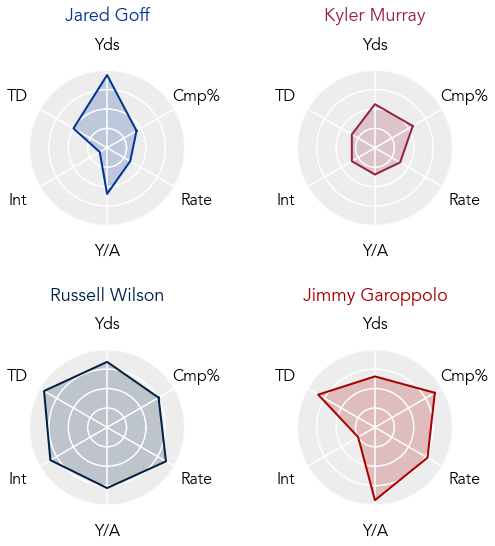

In [64]:
# NFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
sf_data = get_qb_data(data_radar_filtered, 'SFO')
sea_data = get_qb_data(data_radar_filtered, 'SEA')
ari_data = get_qb_data(data_radar_filtered, 'ARI')
lar_data = get_qb_data(data_radar_filtered, 'LAR')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lar_data, team_colors['LAR'])
ax2 = create_radar_chart(ax2, angles, ari_data, team_colors['ARI'])
ax3 = create_radar_chart(ax3, angles, sea_data, team_colors['SEA'])
ax4 = create_radar_chart(ax4, angles, sf_data, team_colors['SFO'])

plt.show()

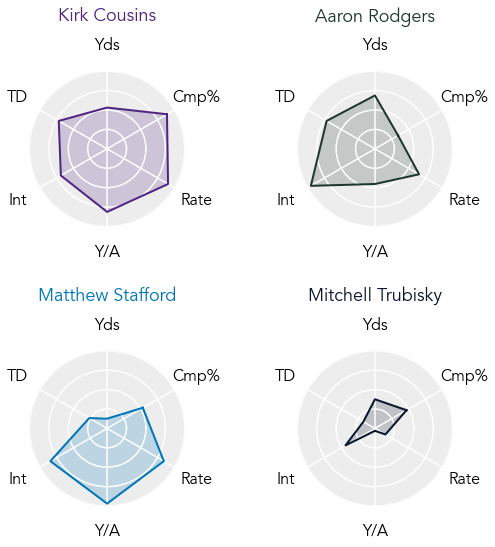

In [65]:
# NFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
min_data = get_qb_data(data_radar_filtered, 'MIN')
gnb_data = get_qb_data(data_radar_filtered, 'GNB')
det_data = get_qb_data(data_radar_filtered, 'DET')
chi_data = get_qb_data(data_radar_filtered, 'CHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, min_data, team_colors['MIN'])
ax2 = create_radar_chart(ax2, angles, gnb_data, team_colors['GNB'])
ax3 = create_radar_chart(ax3, angles, det_data, team_colors['DET'])
ax4 = create_radar_chart(ax4, angles, chi_data, team_colors['CHI'])

plt.show()

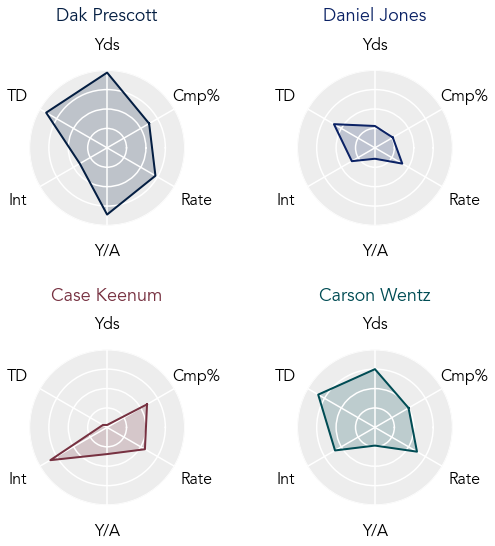

In [66]:
# NFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
dal_data = get_qb_data(data_radar_filtered, 'DAL')
nyg_data = get_qb_data(data_radar_filtered, 'NYG')
was_data = get_qb_data(data_radar_filtered, 'WAS')
phi_data = get_qb_data(data_radar_filtered, 'PHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, dal_data, team_colors['DAL'])
ax2 = create_radar_chart(ax2, angles, nyg_data, team_colors['NYG'])
ax3 = create_radar_chart(ax3, angles, was_data, team_colors['WAS'])
ax4 = create_radar_chart(ax4, angles, phi_data, team_colors['PHI'])

plt.show()

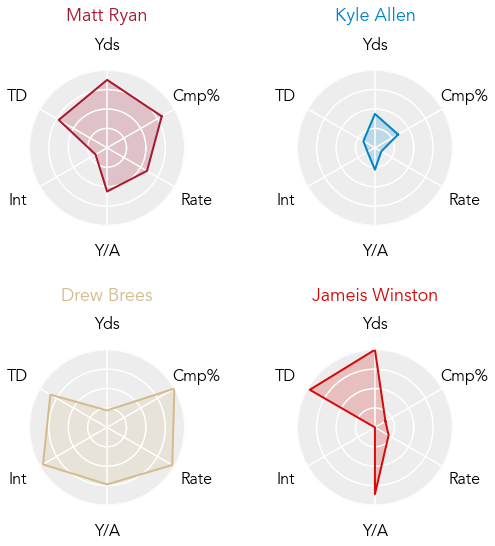

In [67]:
# NFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
atl_data = get_qb_data(data_radar_filtered, 'ATL')
car_data = get_qb_data(data_radar_filtered, 'CAR')
nor_data = get_qb_data(data_radar_filtered, 'NOR')
tam_data = get_qb_data(data_radar_filtered, 'TAM')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, atl_data, team_colors['ATL'])
ax2 = create_radar_chart(ax2, angles, car_data, team_colors['CAR'])
ax3 = create_radar_chart(ax3, angles, nor_data, team_colors['NOR'])
ax4 = create_radar_chart(ax4, angles, tam_data, team_colors['TAM'])

plt.show()

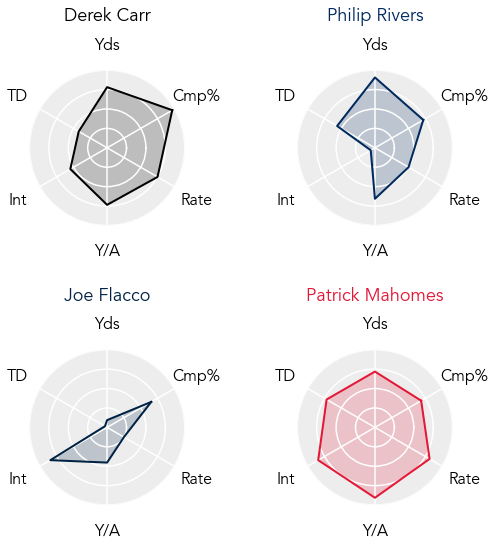

In [68]:
# AFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
oak_data = get_qb_data(data_radar_filtered, 'OAK')
lac_data = get_qb_data(data_radar_filtered, 'LAC')
den_data = get_qb_data(data_radar_filtered, 'DEN')
kan_data = get_qb_data(data_radar_filtered, 'KAN')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, oak_data, team_colors['OAK'])
ax2 = create_radar_chart(ax2, angles, lac_data, team_colors['LAC'])
ax3 = create_radar_chart(ax3, angles, den_data, team_colors['DEN'])
ax4 = create_radar_chart(ax4, angles, kan_data, team_colors['KAN'])

plt.show()

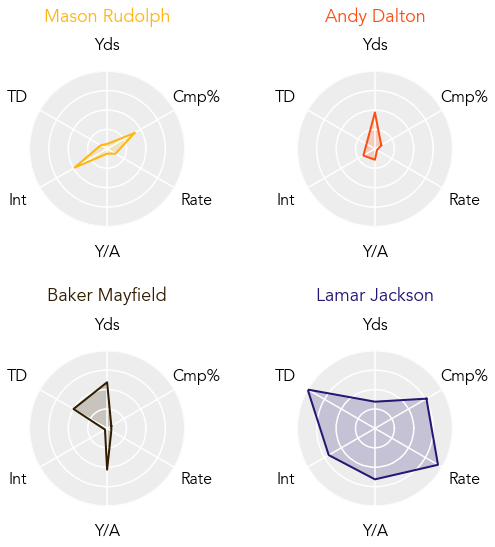

In [69]:
# AFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
pit_data = get_qb_data(data_radar_filtered, 'PIT')
cin_data = get_qb_data(data_radar_filtered, 'CIN')
cle_data = get_qb_data(data_radar_filtered, 'CLE')
bal_data = get_qb_data(data_radar_filtered, 'BAL')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, pit_data, team_colors['PIT'])
ax2 = create_radar_chart(ax2, angles, cin_data, team_colors['CIN'])
ax3 = create_radar_chart(ax3, angles, cle_data, team_colors['CLE'])
ax4 = create_radar_chart(ax4, angles, bal_data, team_colors['BAL'])

plt.show()

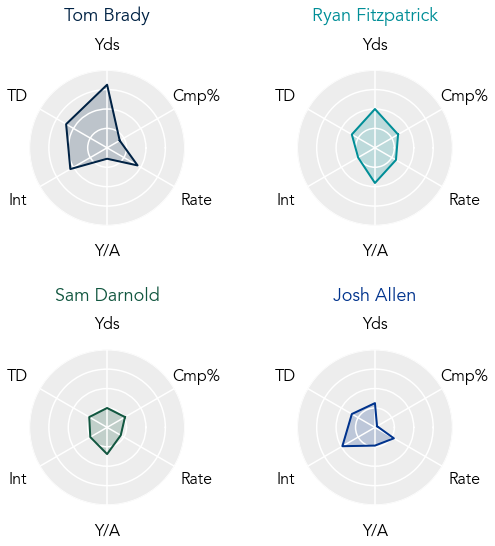

In [70]:
# AFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
nwe_data = get_qb_data(data_radar_filtered, 'NWE')
mia_data = get_qb_data(data_radar_filtered, 'MIA')
nyj_data = get_qb_data(data_radar_filtered, 'NYJ')
buf_data = get_qb_data(data_radar_filtered, 'BUF')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, nwe_data, team_colors['NWE'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, nyj_data, team_colors['NYJ'])
ax4 = create_radar_chart(ax4, angles, buf_data, team_colors['BUF'])

plt.show()

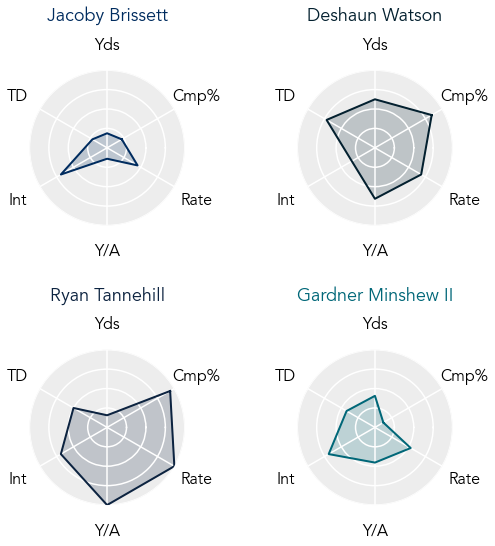

In [71]:
# AFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
ind_data = get_qb_data(data_radar_filtered, 'IND')
hou_data = get_qb_data(data_radar_filtered, 'HOU')
ten_data = get_qb_data(data_radar_filtered, 'TEN')
jax_data = get_qb_data(data_radar_filtered, 'JAX')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, ind_data, team_colors['IND'])
ax2 = create_radar_chart(ax2, angles, hou_data, team_colors['HOU'])
ax3 = create_radar_chart(ax3, angles, ten_data, team_colors['TEN'])
ax4 = create_radar_chart(ax4, angles, jax_data, team_colors['JAX'])

plt.show()

In [72]:
# URL of page
url1 = 'https://www.pro-football-reference.com/years/2020/passing.htm'

# Open URL and pass to BeautifulSoup
html1 = urlopen(url1)
stats_page = BeautifulSoup(html1)

In [73]:
# Collect table headers
column_headers = stats_page.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]
# Collect table rows
rows = stats_page.findAll('tr')[1:]

# Get stats from each row
qb_stats = []
for i in range(len(rows)):
    qb_stats.append([col.getText() for col in rows[i].findAll('td')])
# Create DataFrame from our scraped data
data = pd.DataFrame(qb_stats, columns=column_headers[1:])
# Examine first five rows of data
data.head()

Player   Tm Age Pos   G  GS   QBrec  Cmp  Att  Cmp%  ...    Y/G  \
0   Deshaun Watson*  HOU  25  QB  16  16  4-12-0  382  544  70.2  ...  301.4   
1  Patrick Mahomes*  KAN  25  QB  15  15  14-1-0  390  588  66.3  ...  316.0   
2         Tom Brady  TAM  43  QB  16  16  11-5-0  401  610  65.7  ...  289.6   
3         Matt Ryan  ATL  35  QB  16  16  4-12-0  407  626  65.0  ...  286.3   
4       Josh Allen*  BUF  24  QB  16  16  13-3-0  396  572  69.2  ...  284.0   

    Rate   QBR  Sk  Yds  Sk%  NY/A ANY/A 4QC GWD  
0  112.4  63.7  49  293  8.3  7.64  8.22          
1  108.2  78.1  22  147  3.6  7.53  8.33   3   3  
2  102.2  66.0  21  143  3.3  7.12  7.53   3   3  
3   93.3  59.8  41  257  6.1  6.48  6.52          
4  107.2  76.6  26  159  4.3  7.33  7.82   2   3  

[5 rows x 30 columns]

In [74]:
# Rename sack yards column to `Yds_Sack`
new_columns = data.columns.values
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns

In [75]:
# Select stat categories
categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']
# Create data subset for radar chart
data_radar = data[['Player', 'Tm'] + categories]
data_radar.head()

Player   Tm  Cmp%   Yds  TD Int  Y/A   Rate
0   Deshaun Watson*  HOU  70.2  4823  33   7  8.9  112.4
1  Patrick Mahomes*  KAN  66.3  4740  38   6  8.1  108.2
2         Tom Brady  TAM  65.7  4633  40  12  7.6  102.2
3         Matt Ryan  ATL  65.0  4581  26  11  7.3   93.3
4       Josh Allen*  BUF  69.2  4544  37  10  7.9  107.2

In [76]:
# Convert data to numerical values
for i in categories:
    data_radar[i] = pd.to_numeric(data[i])
# Check data types
data_radar.dtypes

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/2520718453.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Rate      float64
dtype: object

In [77]:
# Remove ornamental characters for achievements
data_radar['Player'] = data_radar['Player'].str.replace('*', '')
data_radar['Player'] = data_radar['Player'].str.replace('+', '')
data_radar.head(32)

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/179037412.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/179037412.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/179037412.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_

Player    Tm  Cmp%     Yds    TD   Int  Y/A   Rate
0       Deshaun Watson   HOU  70.2  4823.0  33.0   7.0  8.9  112.4
1      Patrick Mahomes   KAN  66.3  4740.0  38.0   6.0  8.1  108.2
2            Tom Brady   TAM  65.7  4633.0  40.0  12.0  7.6  102.2
3            Matt Ryan   ATL  65.0  4581.0  26.0  11.0  7.3   93.3
4           Josh Allen   BUF  69.2  4544.0  37.0  10.0  7.9  107.2
5       Justin Herbert   LAC  66.6  4336.0  31.0  10.0  7.3   98.3
6        Aaron Rodgers   GNB  70.7  4299.0  48.0   5.0  8.2  121.5
7         Kirk Cousins   MIN  67.6  4265.0  35.0  13.0  8.3  105.0
8       Russell Wilson   SEA  68.8  4212.0  40.0  13.0  7.5  105.1
9        Philip Rivers   IND  68.0  4169.0  24.0  11.0  7.7   97.0
10          Derek Carr   LVR  67.3  4103.0  27.0   9.0  7.9  101.4
11    Matthew Stafford   DET  64.2  4084.0  26.0  10.0  7.7   96.3
12        Kyler Murray   ARI  67.2  3971.0  26.0  12.0  7.1   94.3
13          Jared Goff   LAR  67.0  3952.0  20.0  13.0  7.2   90.0
14      Ryan Tannehill   TEN  65.5  3819.0  33.0   7.0  7.9  106.5
15  Ben Roethlisberger   PIT  65.6  3803.0  33.0  10.0  6.3   94.1
16   Teddy Bridgewater   CAR  69.1  3733.0  15.0  11.0  7.6   92.1
17      Baker Mayfield   CLE  62.8  3563.0  26.0   8.0  7.3   95.9
18        Daniel Jones   NYG  62.5  2943.0  11.0  10.0  6.6   80.4
19          Drew Brees   NOR  70.5  2942.0  24.0   6.0  7.5  106.4
20           Drew Lock   DEN  57.3  2933.0  16.0  15.0  6.6   75.4
21       Lamar Jackson   BAL  64.4  2757.0  26.0   9.0  7.3   99.3
22          Joe Burrow   CIN  65.3  2688.0  13.0   5.0  6.7   89.8
23          Cam Newton   NWE  65.8  2657.0   8.0  10.0  7.2   82.9
24        Carson Wentz   PHI  57.4  2620.0  16.0  15.0  6.0   72.8
25        Nick Mullens   SFO  64.7  2437.0  12.0  12.0  7.5   84.1
26  Gardner Minshew II   JAX  66.1  2259.0  16.0   5.0  6.9   95.9
27         Sam Darnold   NYJ  59.6  2208.0   9.0  11.0  6.1   72.7
28         Andy Dalton   DAL  64.9  2170.0  14.0   8.0  6.5   87.3
29                None  None   NaN     NaN   NaN   NaN  NaN    NaN
30    Ryan Fitzpatrick   MIA  68.5  2091.0  13.0   8.0  7.8   95.6
31   Mitchell Trubisky   CHI  67.0  2055.0  16.0   8.0  6.9   93.5

In [78]:
# Filter by passing yards
data_radar_filtered = data_radar[data_radar['Yds'] > 1500]
# Create columns with percentile rank
for i in categories:
    data_radar_filtered[i + '_Rank'] = data_radar_filtered[i].rank(pct=True)

# We need to flip the rank for interceptions
data_radar_filtered['Int_Rank'] = 1 - data_radar_filtered['Int_Rank']

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/1239386581.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/1239386581.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m6/8kmn_qcx5f9d1p935z7kjg240000gn/T/ipykernel_36751/1239386581.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [79]:
# Examine data
data_radar_filtered.head()

Player   Tm  Cmp%     Yds    TD   Int  Y/A   Rate  Cmp%_Rank  \
0   Deshaun Watson  HOU  70.2  4823.0  33.0   7.0  8.9  112.4   0.942857   
1  Patrick Mahomes  KAN  66.3  4740.0  38.0   6.0  8.1  108.2   0.542857   
2        Tom Brady  TAM  65.7  4633.0  40.0  12.0  7.6  102.2   0.457143   
3        Matt Ryan  ATL  65.0  4581.0  26.0  11.0  7.3   93.3   0.342857   
4       Josh Allen  BUF  69.2  4544.0  37.0  10.0  7.9  107.2   0.914286   

   Yds_Rank   TD_Rank  Int_Rank  Y/A_Rank  Rate_Rank  
0  1.000000  0.800000  0.757143  1.000000   0.971429  
1  0.971429  0.914286  0.814286  0.885714   0.942857  
2  0.942857  0.957143  0.171429  0.671429   0.771429  
3  0.914286  0.628571  0.271429  0.500000   0.400000  
4  0.885714  0.885714  0.414286  0.828571   0.914286

In [80]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

In [81]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d',
               'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00',
               'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731',
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837',
               'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683',
               'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740',
               'OAK':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000',
               'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

In [82]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset

In [83]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [84]:
# Function to get QB data 2020
def get_qb_data(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

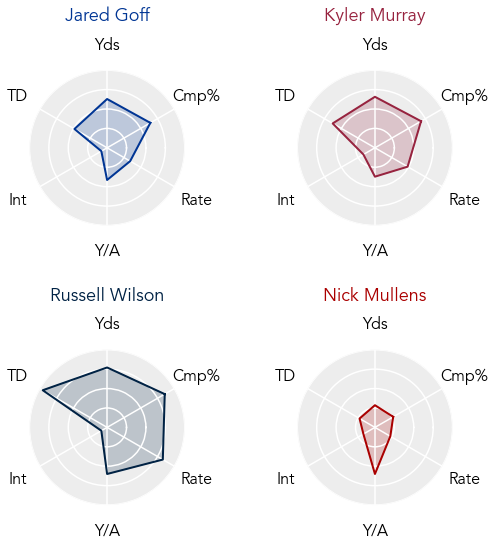

In [85]:
# NFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
sf_data = get_qb_data(data_radar_filtered, 'SFO')
sea_data = get_qb_data(data_radar_filtered, 'SEA')
ari_data = get_qb_data(data_radar_filtered, 'ARI')
lar_data = get_qb_data(data_radar_filtered, 'LAR')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lar_data, team_colors['LAR'])
ax2 = create_radar_chart(ax2, angles, ari_data, team_colors['ARI'])
ax3 = create_radar_chart(ax3, angles, sea_data, team_colors['SEA'])
ax4 = create_radar_chart(ax4, angles, sf_data, team_colors['SFO'])

plt.show()

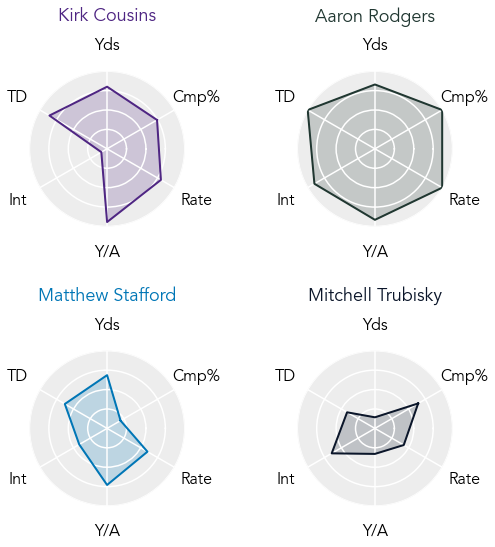

In [86]:
# NFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
min_data = get_qb_data(data_radar_filtered, 'MIN')
gnb_data = get_qb_data(data_radar_filtered, 'GNB')
det_data = get_qb_data(data_radar_filtered, 'DET')
chi_data = get_qb_data(data_radar_filtered, 'CHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, min_data, team_colors['MIN'])
ax2 = create_radar_chart(ax2, angles, gnb_data, team_colors['GNB'])
ax3 = create_radar_chart(ax3, angles, det_data, team_colors['DET'])
ax4 = create_radar_chart(ax4, angles, chi_data, team_colors['CHI'])

plt.show()

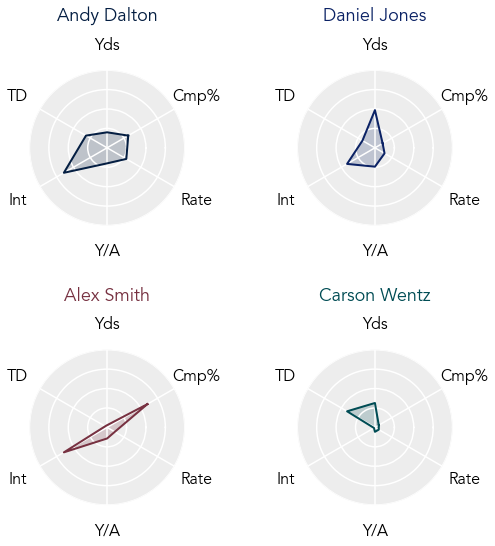

In [87]:
# NFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
dal_data = get_qb_data(data_radar_filtered, 'DAL')
nyg_data = get_qb_data(data_radar_filtered, 'NYG')
was_data = get_qb_data(data_radar_filtered, 'WAS')
phi_data = get_qb_data(data_radar_filtered, 'PHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, dal_data, team_colors['DAL'])
ax2 = create_radar_chart(ax2, angles, nyg_data, team_colors['NYG'])
ax3 = create_radar_chart(ax3, angles, was_data, team_colors['WAS'])
ax4 = create_radar_chart(ax4, angles, phi_data, team_colors['PHI'])

plt.show()

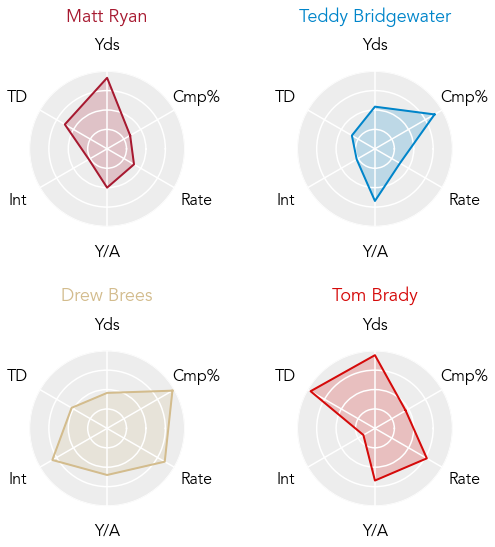

In [88]:
# NFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
atl_data = get_qb_data(data_radar_filtered, 'ATL')
car_data = get_qb_data(data_radar_filtered, 'CAR')
nor_data = get_qb_data(data_radar_filtered, 'NOR')
tam_data = get_qb_data(data_radar_filtered, 'TAM')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, atl_data, team_colors['ATL'])
ax2 = create_radar_chart(ax2, angles, car_data, team_colors['CAR'])
ax3 = create_radar_chart(ax3, angles, nor_data, team_colors['NOR'])
ax4 = create_radar_chart(ax4, angles, tam_data, team_colors['TAM'])

plt.show()

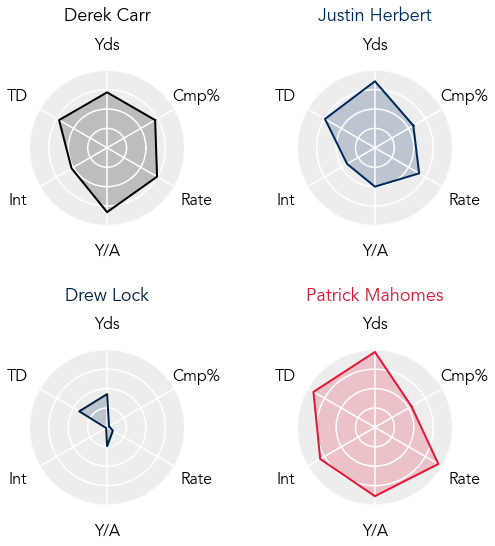

In [89]:
# AFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
oak_data = get_qb_data(data_radar_filtered, 'LVR')
lac_data = get_qb_data(data_radar_filtered, 'LAC')
den_data = get_qb_data(data_radar_filtered, 'DEN')
kan_data = get_qb_data(data_radar_filtered, 'KAN')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, oak_data, team_colors['OAK'])
ax2 = create_radar_chart(ax2, angles, lac_data, team_colors['LAC'])
ax3 = create_radar_chart(ax3, angles, den_data, team_colors['DEN'])
ax4 = create_radar_chart(ax4, angles, kan_data, team_colors['KAN'])

plt.show()

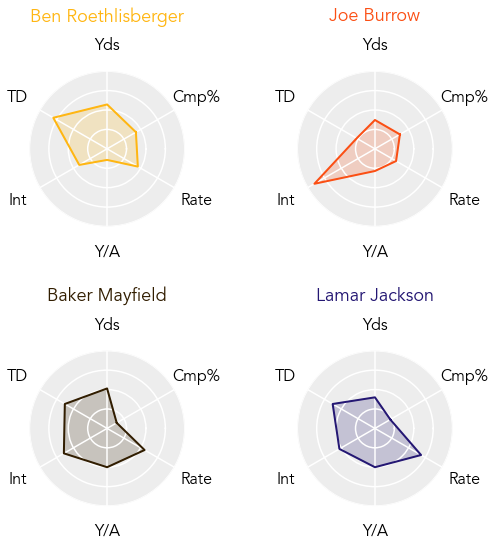

In [90]:
# AFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
pit_data = get_qb_data(data_radar_filtered, 'PIT')
cin_data = get_qb_data(data_radar_filtered, 'CIN')
cle_data = get_qb_data(data_radar_filtered, 'CLE')
bal_data = get_qb_data(data_radar_filtered, 'BAL')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, pit_data, team_colors['PIT'])
ax2 = create_radar_chart(ax2, angles, cin_data, team_colors['CIN'])
ax3 = create_radar_chart(ax3, angles, cle_data, team_colors['CLE'])
ax4 = create_radar_chart(ax4, angles, bal_data, team_colors['BAL'])

plt.show()

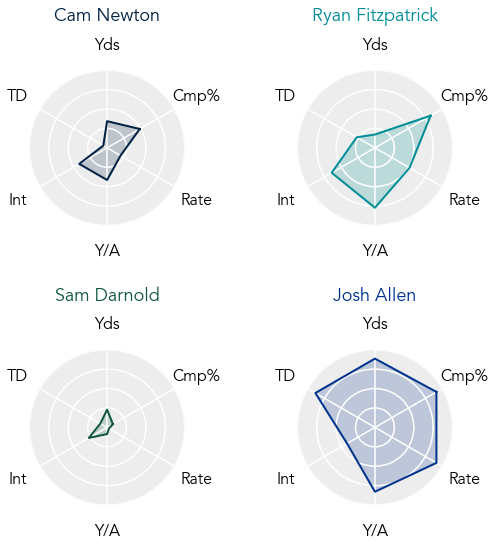

In [91]:
# AFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
nwe_data = get_qb_data(data_radar_filtered, 'NWE')
mia_data = get_qb_data(data_radar_filtered, 'MIA')
nyj_data = get_qb_data(data_radar_filtered, 'NYJ')
buf_data = get_qb_data(data_radar_filtered, 'BUF')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, nwe_data, team_colors['NWE'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, nyj_data, team_colors['NYJ'])
ax4 = create_radar_chart(ax4, angles, buf_data, team_colors['BUF'])

plt.show()

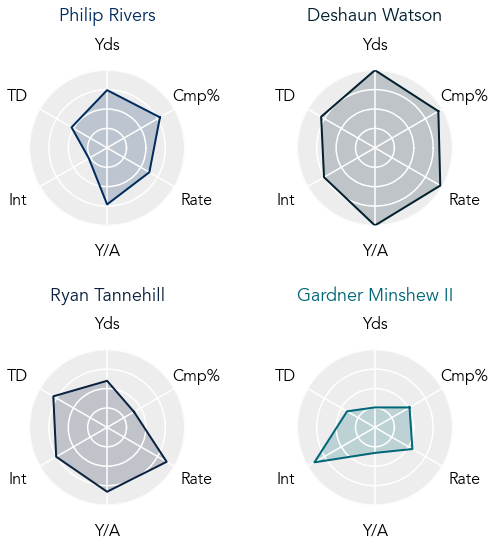

In [92]:
# AFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
ind_data = get_qb_data(data_radar_filtered, 'IND')
hou_data = get_qb_data(data_radar_filtered, 'HOU')
ten_data = get_qb_data(data_radar_filtered, 'TEN')
jax_data = get_qb_data(data_radar_filtered, 'JAX')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, ind_data, team_colors['IND'])
ax2 = create_radar_chart(ax2, angles, hou_data, team_colors['HOU'])
ax3 = create_radar_chart(ax3, angles, ten_data, team_colors['TEN'])
ax4 = create_radar_chart(ax4, angles, jax_data, team_colors['JAX'])

plt.show()